# Aplicación de métodos supervisados en la clasificación de objetos celestes
## Sistemas basados en conocimiento
### Luis David Huante
### A 28 de mayo de 2024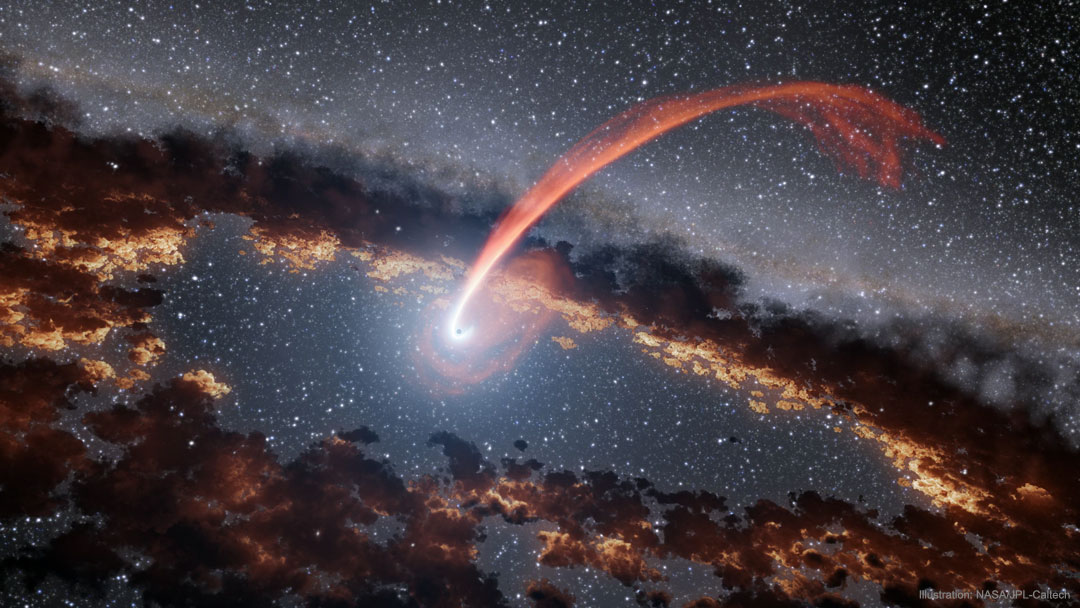

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer

## Introducción


La clasificación de objetos celestes es una herramienta muy importante en el campo de la astronomía, permitiendo a los científicos comprender mejor la composición y la estructura del universo. Este proyecto se centra en la aplicación de técnicas de aprendizaje automático supervisado para la clasificación de estrellas, galaxias y cuásares utilizando datos obtenidos del Sloan Digital Sky Survey (SDSS). Con este proyecto, se busca explorar la capacidad de diferentes algoritmos al categorizar estos objetos astronómicos basándonos en sus características espectrales.

En el contexto de la astronomía, el aprendizaje automático puede ser particularmente valioso, permitiendo análisis complejos de grandes conjuntos de datos. La SDSS proporciona un recurso extenso con más de 100,000 observaciones, cada una descrita por 17 atributos.

En este trabajo, se inmplementó y comparó el rendimiento de varios algoritmos clásicos de aprendizaje automático, incluyendo Naive Bayes, k-Vecinos más cercanos, Árboles de decisión, Regresión logística y Máquinas de soporte vectorial. Además, se desarrolló un método de ensamble que combina las predicciones de estos modelos individuales. La elección de estos métodos y sus configuraciones se justifica tanto por sus capacidades teóricas como por su capacidad para manejar las especificidades de los datos astronómicos.


## Descripción y exploración de los datos

In [72]:
data = pd.read_csv('star_classification.csv')

data.head()


,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [5]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


### Análisis exploratorio

<ipython-input-68-0e1396b0cfff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


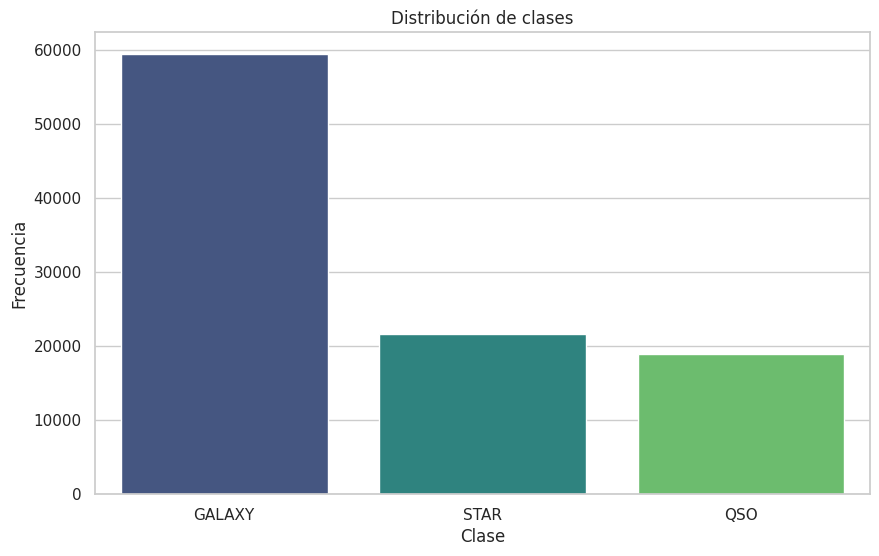

In [68]:
sns.set(style="whitegrid")

class_distribution = data['class'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

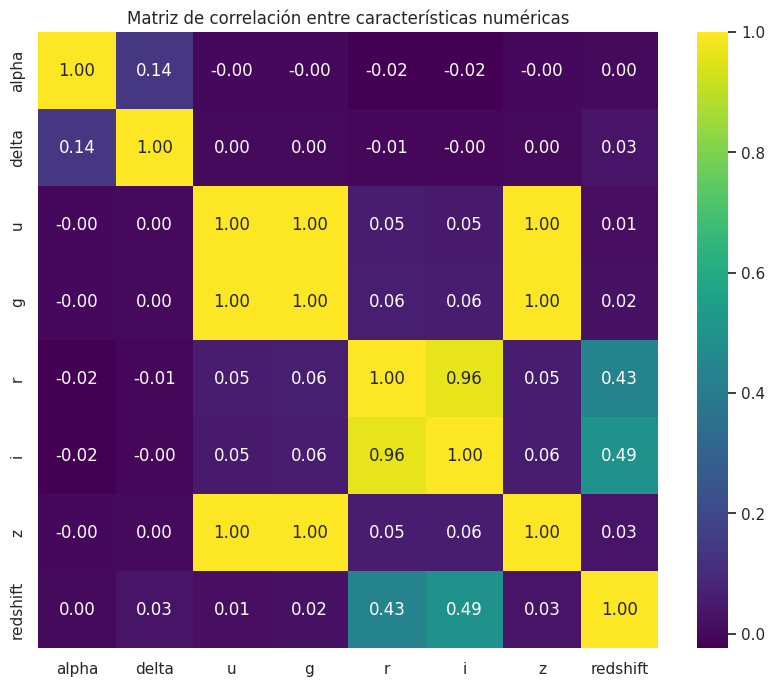

In [17]:
relevant_columns = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift', 'class']

correlation_matrix_relevant = data[relevant_columns[:-1]].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_relevant, annot=True, fmt=".2f", cmap='viridis')
plt.title('Matriz de correlación entre características numéricas')
plt.show()


Las magnitudes ('u', 'g', 'r', 'i', 'z') muestran una alta correlación entre sí, lo cual es esperable, ya que son mediciones de la intensidad de la luz en diferentes partes del espectro provenientes del mismo objeto. El 'redshift' también muestra alguna correlación con estas magnitudes, sugiriendo una relación entre la distancia o velocidad de recesión de un objeto y su brillo aparente en diferentes bandas.

<ipython-input-73-2381706c9180>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
<ipython-input-73-2381706c9180>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
<ipython-input-73-2381706c9180>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
<ipython-input-73-2381706c9180>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

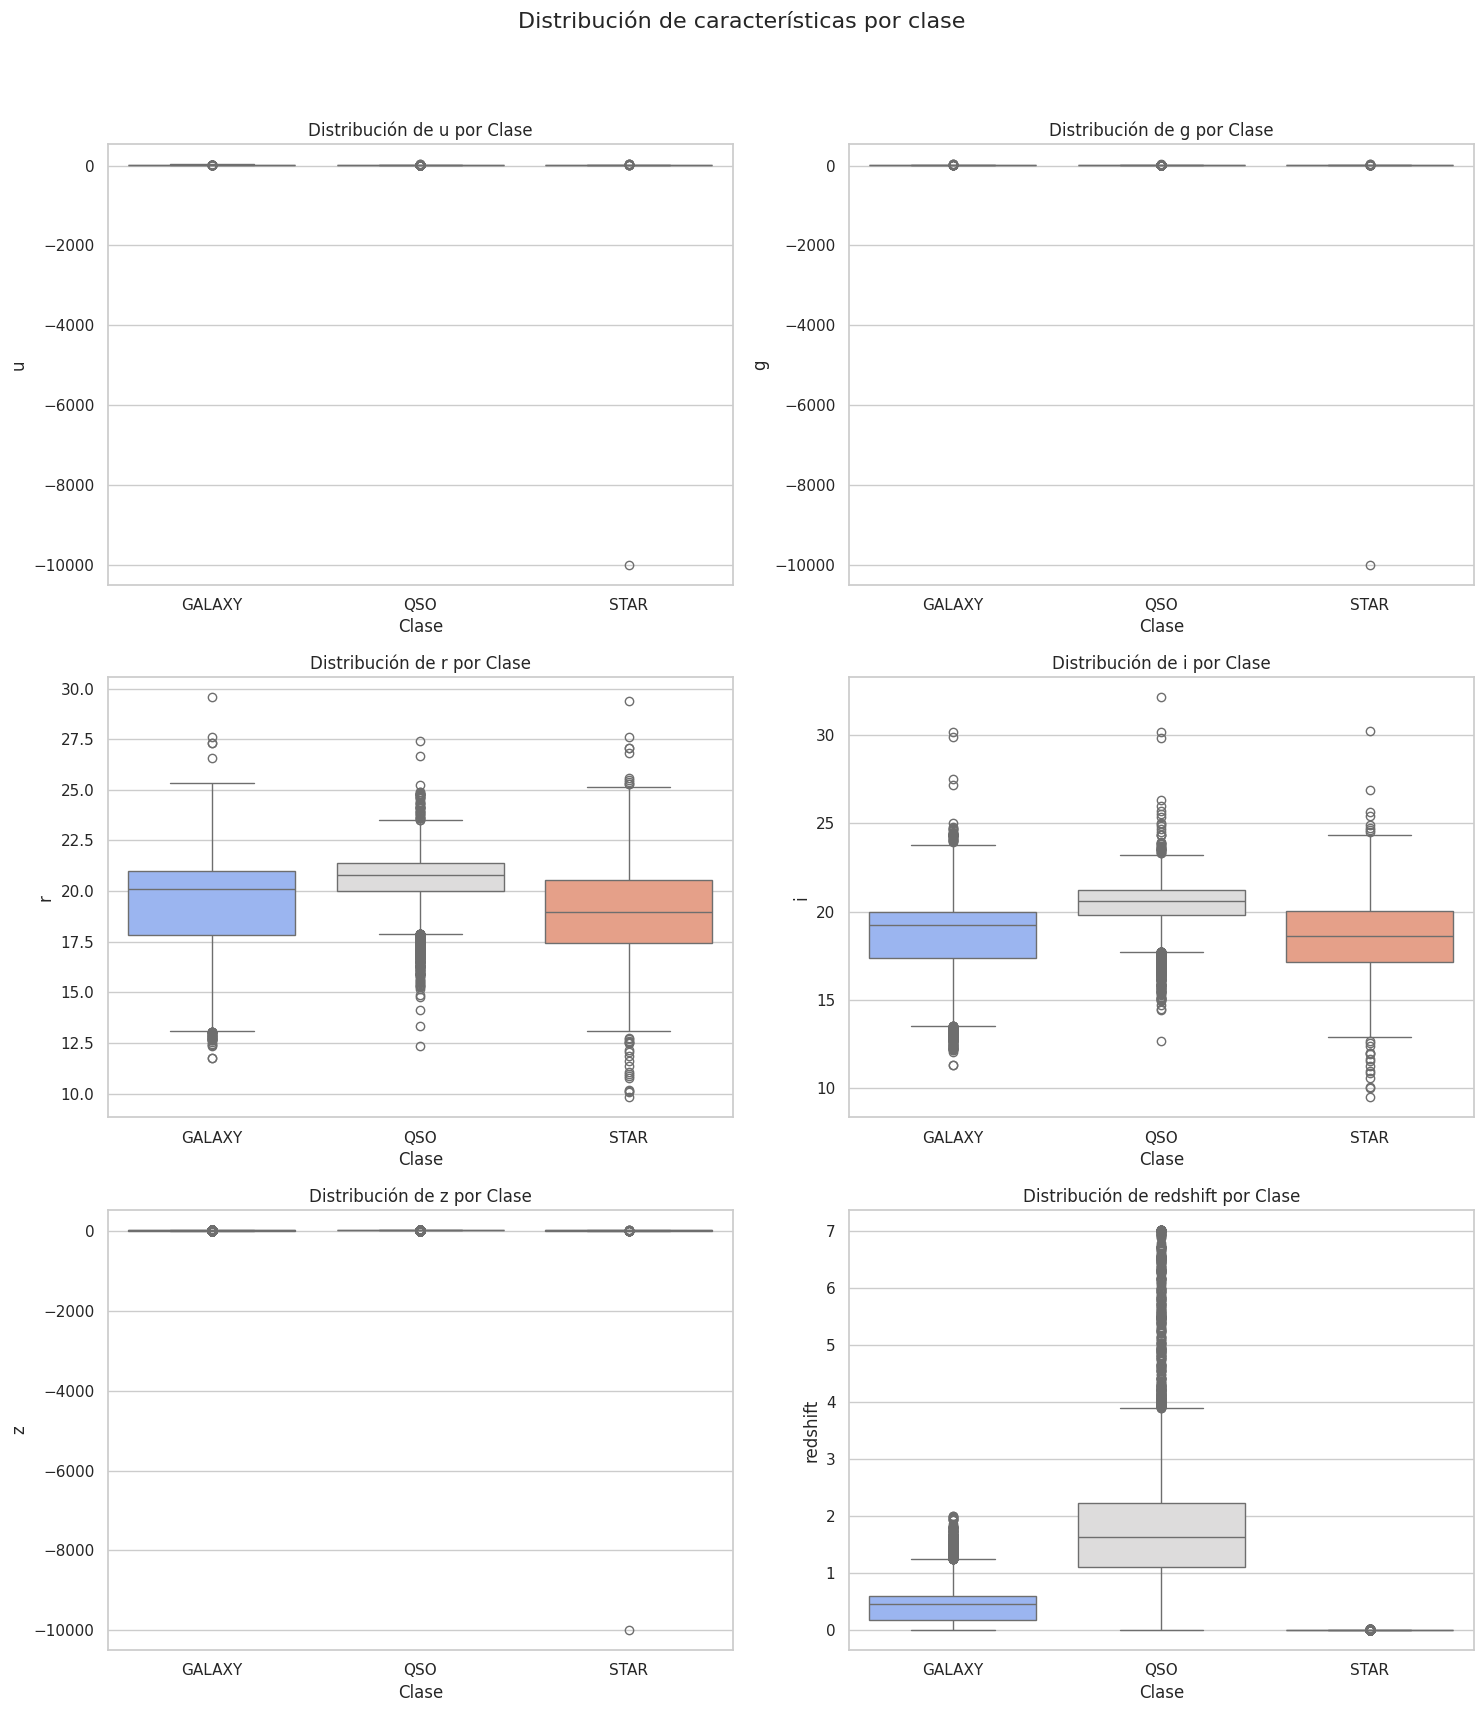

In [73]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribución de características por clase', fontsize=16)

features_to_plot = ['u', 'g', 'r', 'i', 'z', 'redshift']

for i, feature in enumerate(features_to_plot):
    ax = axes[i//2, i%2]
    sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
    ax.set_title(f'Distribución de {feature} por Clase')
    ax.set_xlabel('Clase')
    ax.set_ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Los ejes que muestran valores en 0 o cercanos a 0 en los gráficos de caja para las variables z, u y g indican que hay valores atípicos extremos o valores mal codificados (como -9999). Estos valores extremos pueden distorsionar la escala del gráfico y hacer que la mayoría de los datos reales se agrupen cerca del cero.

In [19]:
extreme_values = data[['u', 'g', 'r', 'i', 'z']].describe(percentiles=[0.01, 0.99])
extreme_values


,u,g,r,i,z
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,21.980468,20.531387,19.645762,19.084854,18.668810
std,31.769291,31.750292,1.854760,1.757895,31.728152
min,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000
1%,17.142674,15.829114,15.227630,14.918110,14.663328
50%,22.179135,21.099835,20.125290,19.405145,19.004595
99%,26.657341,24.637623,22.794967,22.158517,22.365484
max,32.781390,31.602240,29.571860,32.141470,29.383740


Los valores extremadamente bajos de -9999 para las características 'u', 'g', y 'z' parecen ser codificaciones para valores faltantes o errores. Esto distorsiona significativamente las gráficas y lo que podemos hacer con ellos es:

- Imputar estos valores: Podemos reemplazar los -9999 con la mediana o la media de cada característica, aunque la mediana es generalmente más robusta frente a los valores atípicos.
- Eliminar estos valores: Si el número de registros con -9999 no es significativo en comparación con el tamaño total del dataset, podríamos considerar eliminar estos registros.

In [20]:
for column in ['u', 'g', 'z']:
    median_value = data[column][data[column] != -9999].median()
    data[column].replace(-9999, median_value, inplace=True)

<ipython-input-71-2c58133b3c89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
<ipython-input-71-2c58133b3c89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
<ipython-input-71-2c58133b3c89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
<ipython-input-71-2c58133b3c89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

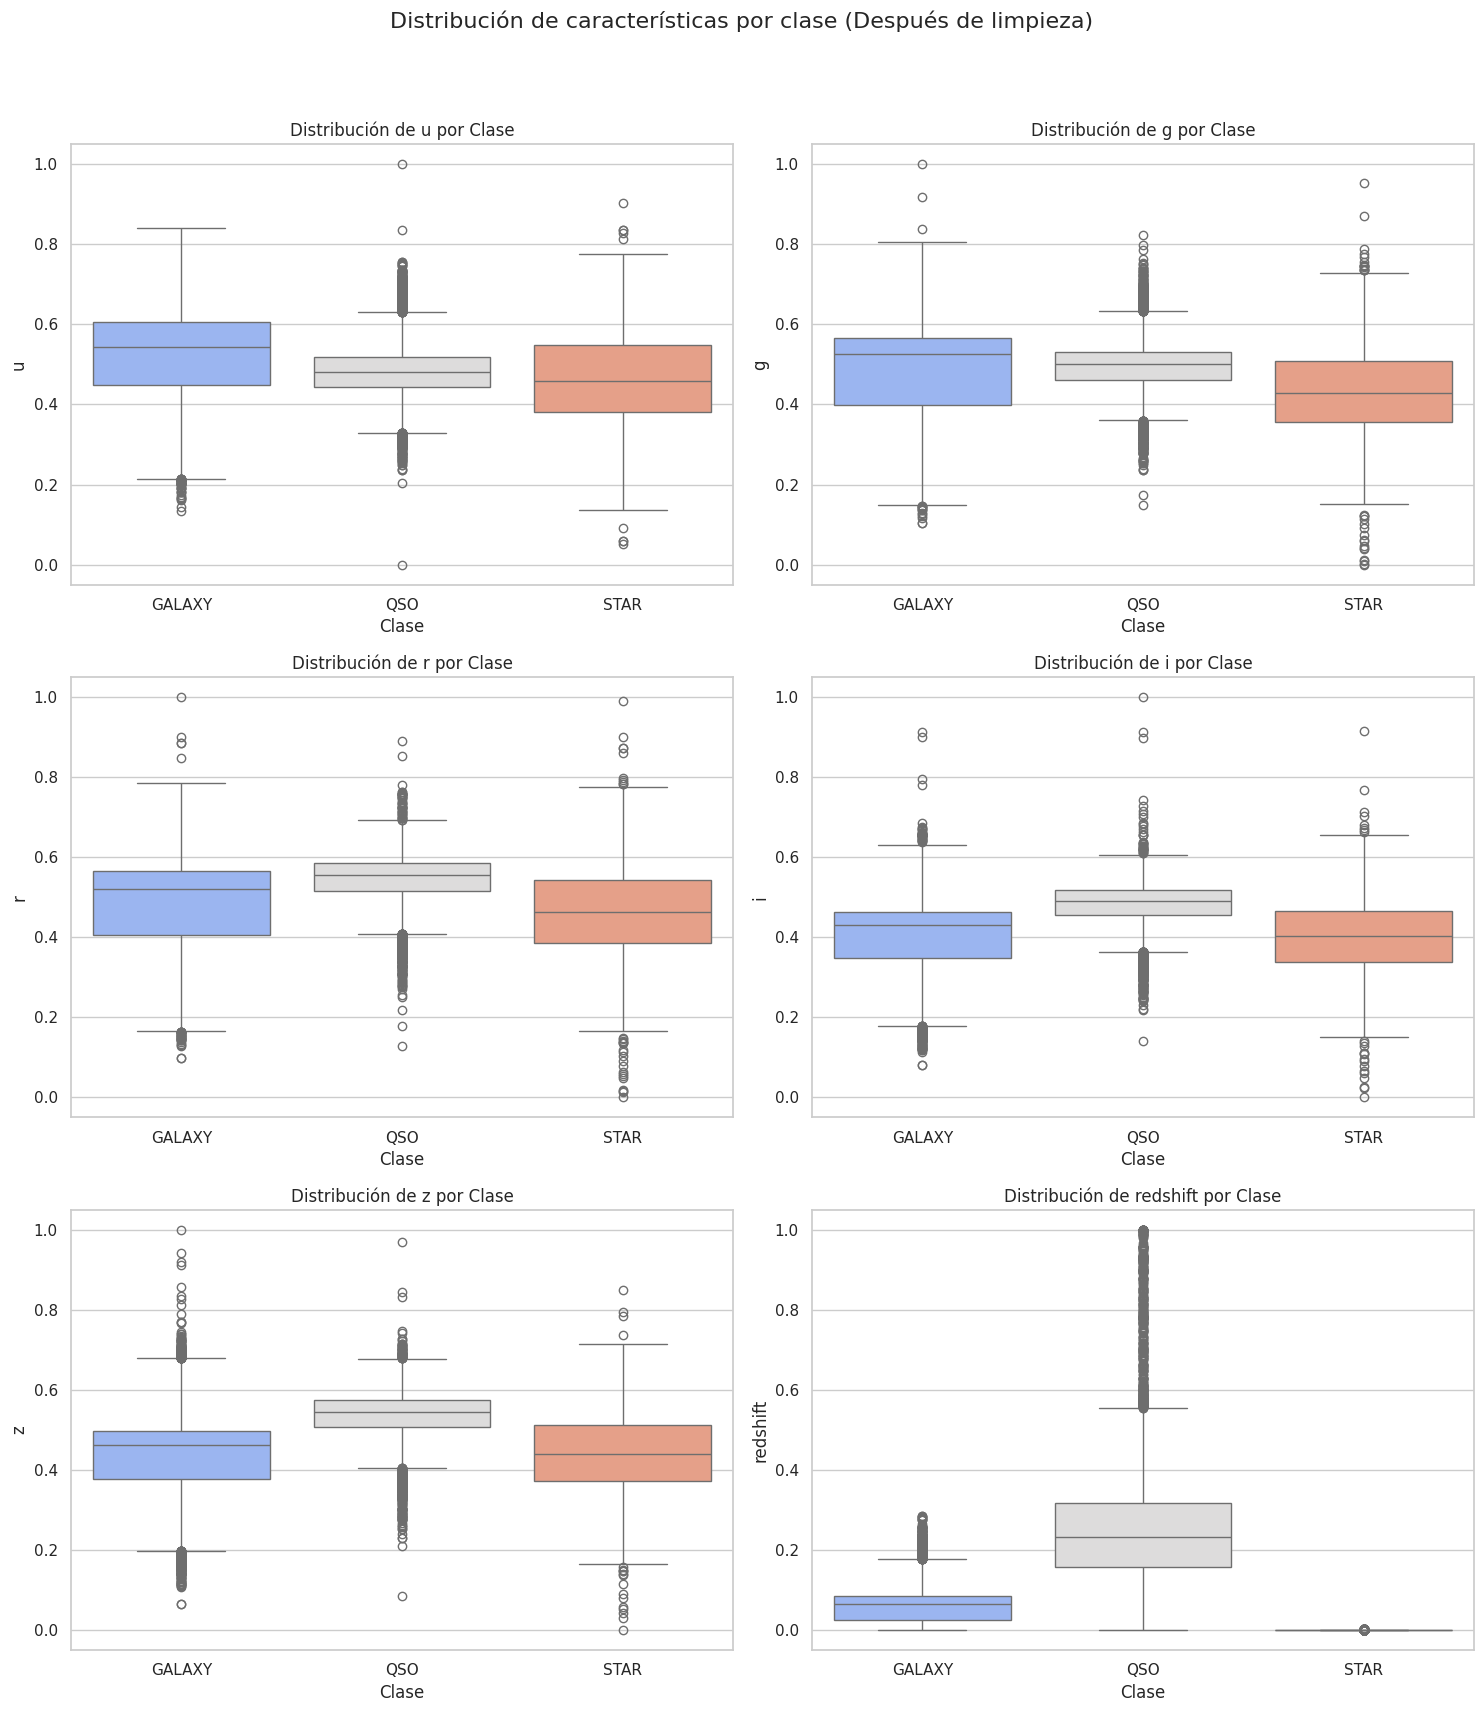

In [71]:
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
fig.suptitle('Distribución de características por clase (Después de limpieza)', fontsize=16)

for i, feature in enumerate(features_to_plot):
    ax = axes[i//2, i%2]
    sns.boxplot(x='class', y=feature, data=data, ax=ax, palette='coolwarm')
    ax.set_title(f'Distribución de {feature} por Clase')
    ax.set_xlabel('Clase')
    ax.set_ylabel(feature)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Magnitudes ('u', 'g', 'r', 'i', 'z'):

- Estrellas: Tienen generalmente magnitudes más altas (menos negativas, lo que indica mayor brillo) en todas las bandas comparadas con las galaxias y quásares. Esto va acorde con el hecho de que las estrellas son objetos más cercanos y, por lo tanto, aparecen más brillantes en estas bandas.
- Galaxias: Presentan una variabilidad considerable en sus magnitudes, pero tienden a ser menos brillantes que las estrellas, lo cual refleja su mayor distancia de la Tierra. La dispersión en las magnitudes también puede indicar una diversidad en el tipo y tamaño de las galaxias observadas.
- Quásares: Muestran un rango similar de magnitudes a las galaxias pero con una dispersión ligeramente menor. Los quásares, dado que son núcleos activos, pueden ser extremadamente brillantes.


Redshift:

- Estrellas: Los valores de redshift son cercanos a cero, lo que es esperado ya que el redshift mide la velocidad relativa de alejamiento y las estrellas en nuestra galaxia no se alejan a velocidades comparables a las de galaxias o quásares.
- Galaxias y Quásares: Ambos muestran valores más altos de redshift, con los quásares típicamente exhibiendo los valores más altos. Esto refleja su gran distancia desde la Tierra y la expansión del universo, que aleja los objetos más distantes a velocidades más altas.

Implicaciones para el modelo:

- Diferenciación entre clases: Las estrellas se pueden identificar claramente por su brillo y bajo redshift, mientras que los quásares y galaxias pueden diferenciarse más por sus valores de redshift y variaciones en las magnitudes.
- Preprocesamiento de características: Debido a la variabilidad en las escalas de magnitudes y redshift, la normalización o estandarización es importante para asegurar que todas las características contribuyan correctamente al modelo.

Ahora veremos las distribuciones de las variables numéricas con histogramas de frecuencia:

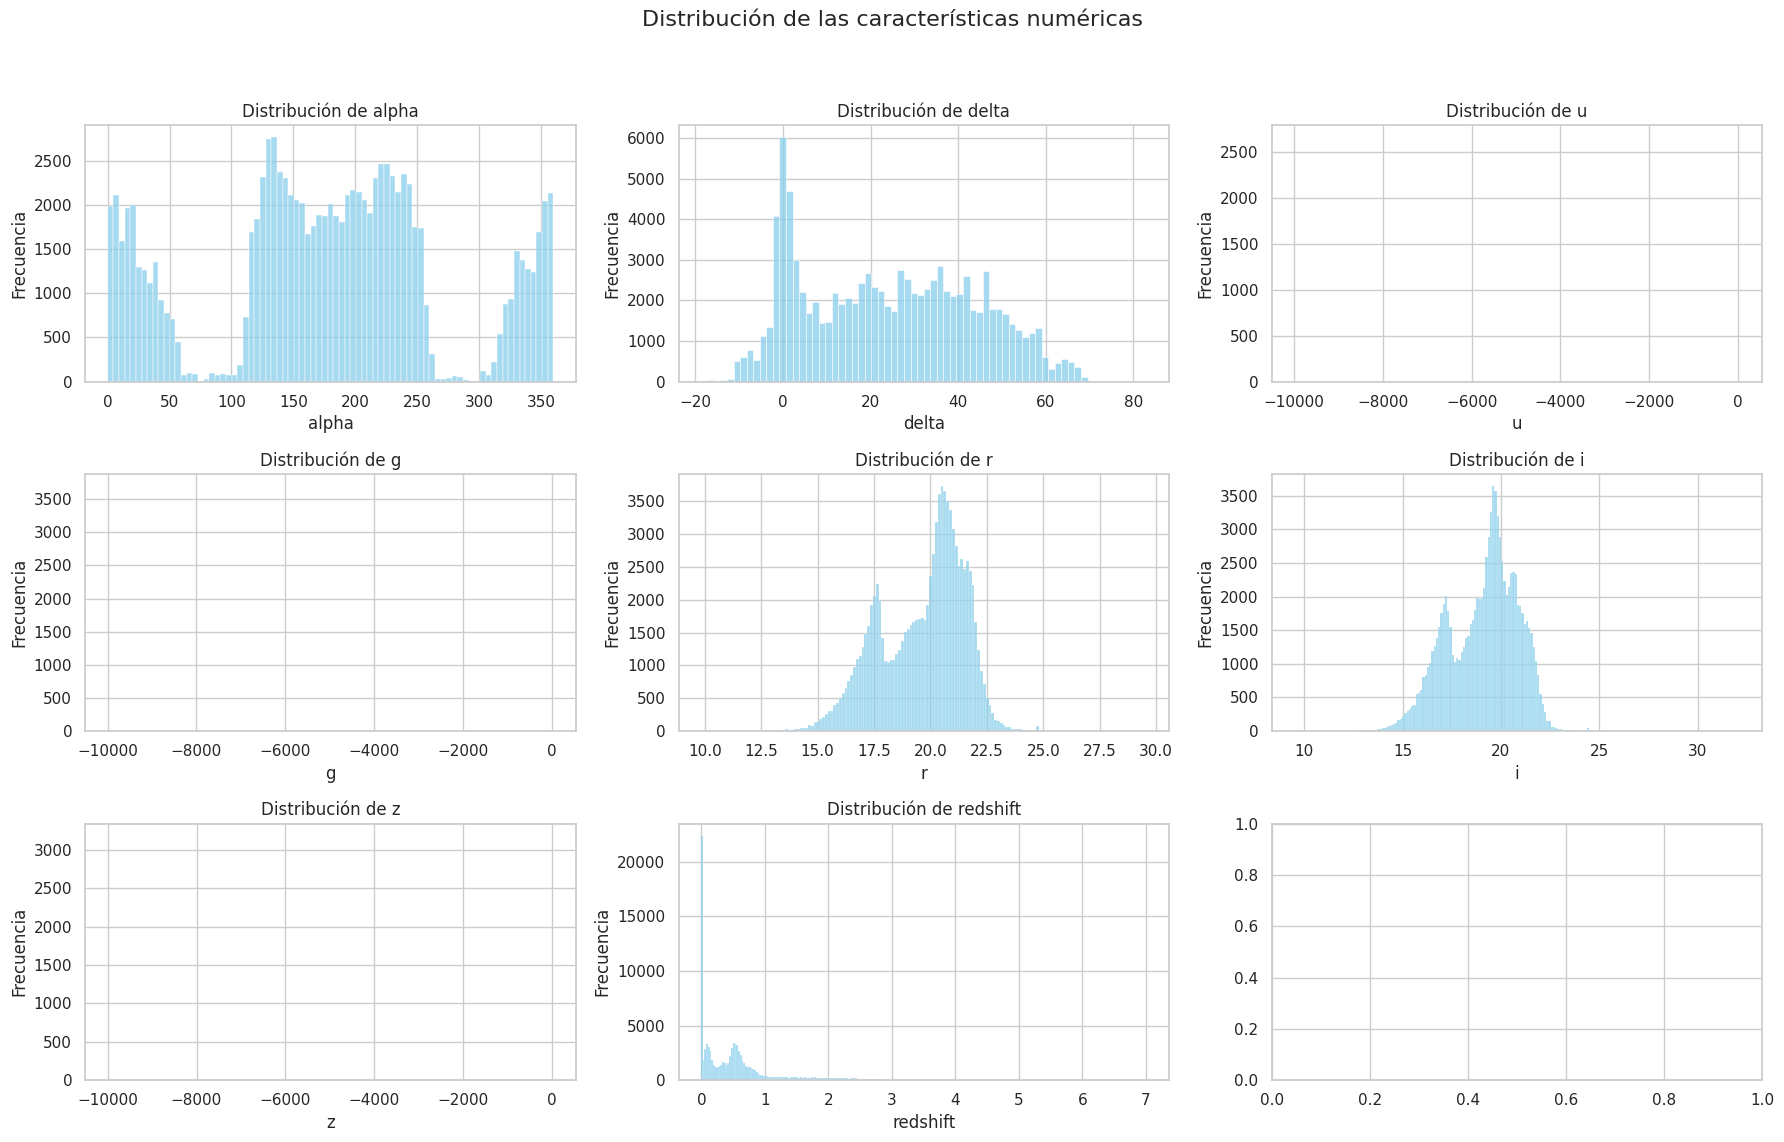

<Figure size 800x600 with 0 Axes>

In [74]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Distribución de las características numéricas', fontsize=16)

num_features = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
for i, feature in enumerate(num_features):
    ax = axes[i//3, i%3]
    sns.histplot(data[feature], kde=False, ax=ax, color='skyblue')
    ax.set_title(f'Distribución de {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frecuencia')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.figure(figsize=(8, 6))
plt.show()


## Implementación de modelos

### Preprocesamiento

In [31]:
missing_values = data.isnull().sum()

label_encoder = LabelEncoder()
data['class_encoded'] = label_encoder.fit_transform(data['class'])

scaler = MinMaxScaler()

columns_to_scale = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'redshift']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

missing_values


obj_ID           0
alpha            0
delta            0
u                0
g                0
r                0
i                0
z                0
run_ID           0
rerun_ID         0
cam_col          0
field_ID         0
spec_obj_ID      0
class            0
redshift         0
plate            0
MJD              0
fiber_ID         0
class_encoded    0
dtype: int64

### Modelos individuales

In [38]:
X = data[columns_to_scale]
y = data['class_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
param_grids = {
    "Gaussian Naive Bayes": {},
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    "Decision Tree": {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "Logistic Regression": {
        'C': [0.1, 1, 10, 100],
        'solver': ['liblinear', 'lbfgs']
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }
}

optimized_models = {}
for name, model in models.items():
    if param_grids[name]:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        optimized_models[name] = grid_search.best_estimator_
        print(f"Best parameters for {name}: {grid_search.best_params_}")
    else:
        optimized_models[name] = model
        model.fit(X_train, y_train)
        print(f"No parameters to optimize for {name}")


In [59]:
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(metric='manhattan', n_neighbors=5, weights='distance'),
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10),
    "Logistic Regression": LogisticRegression(C=100, solver='lbfgs', max_iter=1000),
    "Support Vector Machine": SVC(C=10, kernel='rbf', gamma='scale')
}


In [55]:
evaluation_reports = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    report = classification_report(y_test, predictions)
    evaluation_reports[name] = report


### Evaluación de modelos

In [58]:
results = {}

for name, report in evaluation_reports.items():
    print(f"Modelo: {name}")
    print(report)
    print("-" * 50)

Modelo: Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       0.96      0.91      0.94     11889
           1       0.78      0.88      0.83      3792
           2       0.98      0.99      0.98      4319

    accuracy                           0.92     20000
   macro avg       0.90      0.93      0.92     20000
weighted avg       0.93      0.92      0.93     20000

--------------------------------------------------
Modelo: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     11889
           1       0.97      0.91      0.94      3792
           2       0.90      0.92      0.91      4319

    accuracy                           0.94     20000
   macro avg       0.94      0.93      0.93     20000
weighted avg       0.94      0.94      0.94     20000

--------------------------------------------------
Modelo: Decision Tree
              precision    recall  f1-score   support

  

### Modelo de ensamble

In [60]:
# Configuración del ensamble (Voting Classifier)
ensemble = VotingClassifier(estimators=[(name, model) for name, model in models.items()], voting='hard')
ensemble.fit(X_train, y_train)
ensemble_predictions = ensemble.predict(X_test)
ensemble_report = classification_report(y_test, ensemble_predictions, output_dict=True)
results["Ensemble"] = ensemble_report

{model: result['accuracy'] for model, result in results.items()}


{'Gaussian Naive Bayes': 0.9239,
 'K-Nearest Neighbors': 0.93105,
 'Decision Tree': 0.96365,
 'Logistic Regression': 0.9345,
 'Support Vector Machine': 0.95855,
 'Ensemble': 0.96955}

In [69]:
+for name, model in models.items():
    model.fit(X_train, y_train)
ensemble.fit(X_train, y_train)  +

f2_scores = {}


for name, model in models.items():
    predictions = model.predict(X_test)
    f2_score_value = fbeta_score(y_test, predictions, beta=2, average='weighted')
    f2_scores[name] = f2_score_value

ensemble_predictions = ensemble.predict(X_test)
ensemble_f2_score = fbeta_score(y_test, ensemble_predictions, beta=2, average='weighted')
f2_scores['Ensemble'] = ensemble_f2_score

for name, score in f2_scores.items():
    print(f"F2-score for {name}: {score:.4f}")

F2-score for Gaussian Naive Bayes: 0.9242
F2-score for K-Nearest Neighbors: 0.9399
F2-score for Decision Tree: 0.9721
F2-score for Logistic Regression: 0.9583
F2-score for Support Vector Machine: 0.9676
F2-score for Ensemble: 0.9695


## Análisis y conclusiones

Los resultados de los modelos muestran variaciones en precisión, recall y F1-score, y podemos sacar conclusiones acerca de cómo cada modelo maneja las clases del conjunto de datos:

Gaussian Naive Bayes

- Precisión general (92%): Este modelo tiene un buen rendimiento general, pero tiende a tener problemas con la clase 1, donde tiene la precisión más baja (78%).
- Recall de la clase 1 (88%): Muestra una alta sensibilidad para la clase 1 comparado con su precisión, lo que indica que aunque identifica bien los casos positivos, también tiene un número significativo de falsos positivos.
- F1-score: Buen equilibrio entre precisión y recall para todas las clases, aunque es más bajo para la clase 1 (0.83), reflejando la dificultad del modelo en clasificar esta clase con precisión.

K-Nearest Neighbors

- Precisión general (94%): Este modelo mejora en comparación con Naive Bayes, especialmente en la precisión de la clase 1.
- Recall (91% para la clase 1): Tiene un buen equilibrio entre precisión y recall, mostrando una mejora significativa en la precisión para la clase 1 sin sacrificar el recall.
- F1-score: Consistentemente alto para todas las clases, destacando su eficacia en el manejo de la variabilidad entre clases.

Decision Tree

- Precisión general (97%): Este es uno de los modelos más precisos, especialmente eficaz para las clases 0 y 2.
- Recall (92% para la clase 1): Muestra excelente capacidad de generalización con un alto recall y F1-score para todas las clases.
- F1-score: Muy alto para todas las clases, reflejando un excelente equilibrio entre precisión y recall, lo que indica un modelo bien ajustado que evita el sobreajuste.

Logistic Regression

- Precisión general (96%): Muestra un buen rendimiento con un recall perfecto (100%).
- Recall (89% para la clase 1): Aunque es alto, la clase 1 sigue siendo la más difícil para este modelo.
- F1-score: Alto para todas las clases, con la clase 2 destacándose.

Support Vector Machine

- Precisión general (97%): Muestra la mejor precisión general junto con Decision Tree, muy eficaz en todas las clases.
- Recall (100% para la clase 2): Muy bueno al identificar correctamente todos los verdaderos positivos para la clase 2.
- F1-score: Excelentes valores para todas las clases, con un equilibrio particularmente bueno en la clase 2.

También se calculó el F2-score, el cual hace que el recall sea dos veces más importante que la precisión. Esto podría ser apropiado si es crítico no perder un objeto celeste raro, incluso a costa de hacer más falsos positivos.

**Mejor métrica**

En este tipo de problema de clasificación de objetos celestes donde las clases podrían tener diferentes importancias asociadas con la clasificación, el F1-score proporciona una buena medida del rendimiento porque equilibra tanto la precisión como el recall, y es menos susceptible a las clases desbalanceadas que la simple accuracy.

A lo largo de este proceso, se evaluaron varios modelos de aprendizaje automático utilizando una serie de métricas para determinar su eficacia en la clasificación de objetos celestes. Se optó por el F1-score como métrica principal para tener un equilibrio entre precisión y recall, lo cual es crucial en contextos donde es fundamental no solo capturar todos los casos positivos sino también mantener una alta precisión para evitar falsos positivos. Sin embargo, también fue importante la métrica F2-score, que pone un énfasis adicional en el recall, lo que es esencial en situaciones donde perder un descubrimiento podría tener consecuencias significativas. El usar estas métricas ayudó a identificar modelos que proporcionan un buen equilibrio y también evitar pasar por alto los casos positivos vitales.

El árbol de decisión y las Support Vector Machines (SVM) con kernel RBF demostraron ser muy eficaces. Estos modelos manejaron el desequilibrio de clases y generalizaron bien. La optimización de hiperparámetros desempeñó un papel crucial en maximizar el rendimiento de cada modelo. Mediante el uso de `GridSearchCV`, se exploraron distintos hiperparámetros, lo que resultó en mejoras significativas tanto en la precisión como en el recall. Este proceso es fundamental y muestra cómo es que los hiperparámetros pueden influir enormemente en la eficacia de los modelos.

Los aprendizajes obtenidos resaltan la importancia de comprender profundamente las métricas de evaluación, seleccionar los modelos adecuados, optimizar los hiperparámetros y la implementación de un método de ensamble.